# Combine the Multiple Datafiles into one file

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
import tensorflow as tf
import pandas as pd
import glob
import numpy as np
from sklearn.linear_model import LinearRegression
import os
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import layers, Sequential, callbacks
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers.schedules import ExponentialDecay

import warnings
warnings.filterwarnings("ignore")

In [50]:
# def combine_csv_and_load_data(directory):
#     # Step 1: Get all CSV file paths
#     csv_files = glob.glob(os.path.join(directory, '*.csv'))
#     # Step 2: Read each CSV file and append to list
#     df_list = []
#     for file in csv_files:
#         df = pd.read_csv(file)
#         df_list.append(df)
#     # Step 3: Concatenate all dataframes
#     combined_df = pd.concat(df_list, ignore_index=True)
#     # Step 4: Optionally save to a new CSV file
#     combined_df.to_csv(os.path.join('data/combined_data_traffic.csv'), index=False)
#     # Step 5: Return the combined dataframe
#     return combined_df
# directory = 'data/trafficData'
# combined_df = combine_csv_and_load_data(directory)

In [51]:
# print(combined_df.columns.tolist())

In [52]:
# # Drop specified columns, note that 'avgMeasuredTime' is mentioned twice, but we need to drop it only once.
# combined_df.drop(['REPORT_ID', 'avgMeasuredTime', '_id', 'medianMeasuredTime','status'], axis=1, inplace=True)

# # Rename 'extID' column to 'junction'
# combined_df.rename(columns={'extID': 'junction'}, inplace=True)

In [53]:
# combined_df['TIMESTAMP']=pd.to_datetime(combined_df['TIMESTAMP'])
# combined_df["Year"]=combined_df['TIMESTAMP'].dt.year
# combined_df["Month"]=combined_df['TIMESTAMP'].dt.month
# combined_df["Date_no"]=combined_df['TIMESTAMP'].dt.day
# combined_df["Hour"]=combined_df['TIMESTAMP'].dt.hour
# combined_df["Day"]= combined_df['TIMESTAMP'].dt.strftime("%A")

In [54]:
# # Sort the DataFrame by the 'TIMESTAMP' column in ascending order
# combined_df = combined_df.sort_values(by='TIMESTAMP')

# # Reset the index of the DataFrame, dropping the old index
# combined_df = combined_df.reset_index(drop=True)

In [55]:
# # Use train_test_split for the 80/20 split
# train_df, test_df = train_test_split(combined_df, test_size=0.2, shuffle=False)

# # Reset the index
# train_df = train_df.reset_index(drop=True)
# test_df = test_df.reset_index(drop=True)

# # Save as CSV files
# train_df.to_csv('data/train.csv', index=False)
# test_df.to_csv('data/test.csv', index=False)

In [56]:
#!pip install huggingface_hub
#!pip install datasets 

In [57]:
# from huggingface_hub import notebook_login
# notebook_login()

In [58]:
# from datasets import load_dataset

# # Load dataset into Train & Test splits
# dataset_dict = load_dataset('csv', data_files={'train': 'data/train.csv', 
# # Prepare for upload - you'll need a Hugging Face token 
# dataset_dict.push_to_hub("mugithi/down_sampled_file_traffic_dataset") 


# Quick Analsyis of the dataset

In [59]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
df=pd.read_csv("data/combined_data_traffic.csv")

In [61]:
df.head()

,status,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,TIMESTAMP,vehicleCount,_id,REPORT_ID
0,OK,68,48,762,68,2014-02-13T11:30:00,0,190094,195790
1,OK,68,48,762,68,2014-02-13T11:35:00,0,190543,195790
2,OK,68,48,762,68,2014-02-13T11:40:00,0,190992,195790
3,OK,99,33,762,99,2014-02-13T11:45:00,2,191441,195790
4,OK,61,53,762,61,2014-02-13T11:50:00,3,191890,195790


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13577132 entries, 0 to 13577131
Data columns (total 9 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   status              object
 1   avgMeasuredTime     int64 
 2   avgSpeed            int64 
 3   extID               int64 
 4   medianMeasuredTime  int64 
 5   TIMESTAMP           object
 6   vehicleCount        int64 
 7   _id                 int64 
 8   REPORT_ID           int64 
dtypes: int64(7), object(2)
memory usage: 932.3+ MB


In [63]:
df["TIMESTAMP"]= pd.to_datetime(df["TIMESTAMP"])
df = df.drop(["status","avgMeasuredTime","medianMeasuredTime","_id","REPORT_ID"], axis=1) #dropping IDs
df = df.rename(columns={
    'avgSpeed': 'Speed',
    'extID': 'Junction',
    'TIMESTAMP': 'DateTime',
    'vehicleCount': 'Vehicles'
})

In [64]:
df

,Speed,Junction,DateTime,Vehicles
0,48,762,2014-02-13 11:30:00,0
1,48,762,2014-02-13 11:35:00,0
2,48,762,2014-02-13 11:40:00,0
3,33,762,2014-02-13 11:45:00,2
4,53,762,2014-02-13 11:50:00,3
...,...,...,...,...
13577127,0,1001,2014-06-09 05:00:00,0
13577128,0,1001,2014-06-09 05:05:00,0
13577129,0,1001,2014-06-09 05:10:00,0
13577130,0,1001,2014-06-09 05:15:00,0


In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sum vehicle count per junction
junction_vehicle_sum = df.groupby('Junction')['Vehicles'].sum().reset_index()

# Display the result
print(junction_vehicle_sum)

     Junction  Vehicles
0         610     11847
1         611      3097
2         612     20885
3         613     54325
4         614     29968
..        ...       ...
444      1054    191010
445      1055     75777
446      1056      1383
447      1057    265244
448      1058     30320

[449 rows x 2 columns]


In [66]:
filtered_junction = junction_vehicle_sum[junction_vehicle_sum['Vehicles'] > 435000].reset_index(drop=True)['Junction']

In [67]:
filtered_junction

0     646
1     781
2     852
3    1048
Name: Junction, dtype: int64

In [68]:
# Filter df using 'isin' for efficient matching
df = df[df['Junction'].isin(filtered_junction)].reset_index(drop=True)

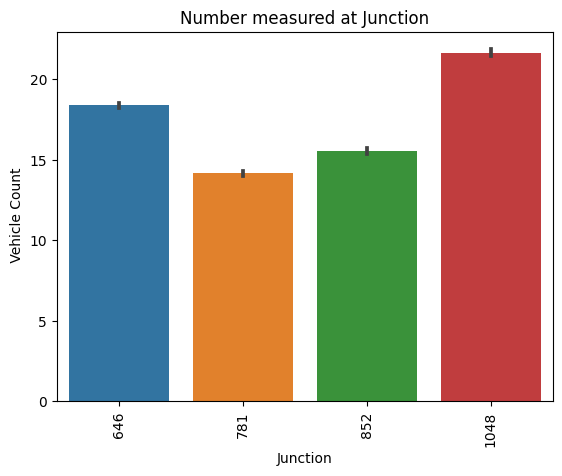

In [69]:
# Plotting the sum of vehicles per junction
sns.barplot(data=df[df['Junction'].isin(filtered_junction)], x='Junction', y='Vehicles')
plt.xlabel('Junction')
plt.ylabel(' Vehicle Count')
plt.title('Number measured at Junction')
plt.xticks(rotation=90)  # Rotate labels to avoid overlap
plt.show()

# Traffic Prediction
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
    
* [3. DATA EXPLORATION](#3) 
    
    * [3.1 FEATURE ENGINEERING](#3.1)
    * [3.2 EXPLORATORY DATA ANALYSIS](#3.2)

    
* [4. DATA TRANSFORMATION AND PREPROCESSING](#4) 
    
* [5. MODEL BUILDING](#5)
    
* [6. FITTING THE MODEL](#6)
    
* [7. INVERSING THE TRANSFORMATION OF DATA](#7)
    
* [8. END](#8)

# Importing Libraries

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import layers, Sequential, callbacks
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers.schedules import ExponentialDecay

import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [71]:
df.head()

,Speed,Junction,DateTime,Vehicles
0,72,781,2014-02-13 11:30:00,29
1,74,781,2014-02-13 11:35:00,28
2,71,781,2014-02-13 11:40:00,17
3,71,781,2014-02-13 11:45:00,21
4,74,781,2014-02-13 11:50:00,21


In [72]:
data = df.copy()

**About the data**

This dataset is a collection of numbers of vehicles at four junctions at an hourly frequency. 
The CSV file provides four features:

* DateTime
* Junctions
* Vehicles
* ID

The sensors on each of these junctions were collecting data at different times, hence the traffic data from different time periods. Some of the junctions have provided limited or sparse data.

# Data Exploration

# Feature Engineering

At this step, I am creating a few new features out of DateTime. 
Namely:
* Year
* Month 
* Date in the given month
* Days of week 
* Hour

In [73]:
#Exploring more features 
df["Year"]= df['DateTime'].dt.year
df["Month"]= df['DateTime'].dt.month
df["Date_no"]= df['DateTime'].dt.day
df["Hour"]= df['DateTime'].dt.hour
df["Day"]= df.DateTime.dt.strftime("%A")
df.head()

,Speed,Junction,DateTime,Vehicles,Year,Month,Date_no,Hour,Day
0,72,781,2014-02-13 11:30:00,29,2014,2,13,11,Thursday
1,74,781,2014-02-13 11:35:00,28,2014,2,13,11,Thursday
2,71,781,2014-02-13 11:40:00,17,2014,2,13,11,Thursday
3,71,781,2014-02-13 11:45:00,21,2014,2,13,11,Thursday
4,74,781,2014-02-13 11:50:00,21,2014,2,13,11,Thursday


# Exploratory Data Analysis

Plotting the newly created features

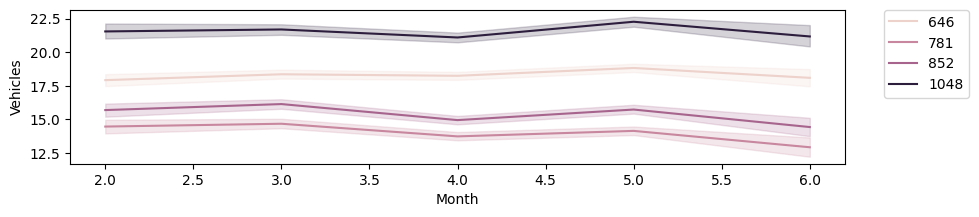

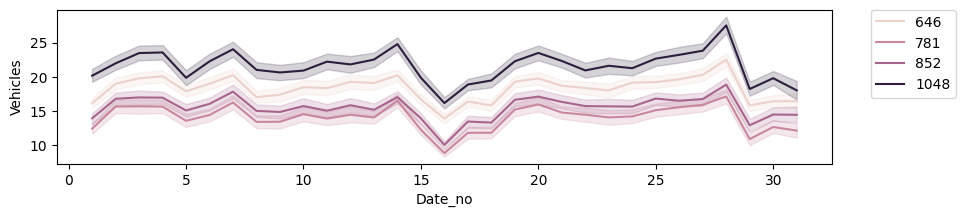

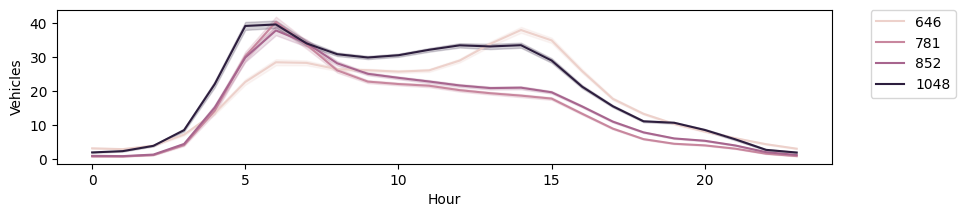

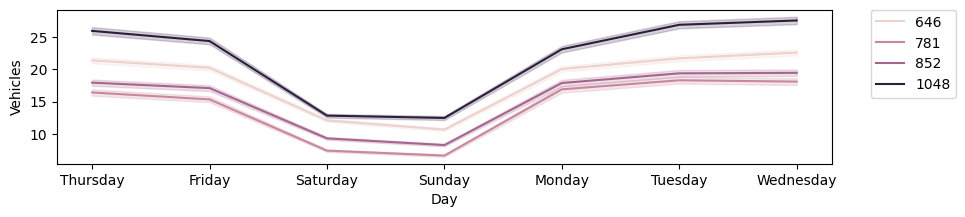

In [74]:
#Let's plot the Timeseries
new_features = ["Month", "Date_no", "Hour", "Day"]

for i in new_features:
    plt.figure(figsize=(10, 2))
    ax=sns.lineplot(x=df[i],y="Vehicles",data=df, hue="Junction")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**From the above plot following things can be concluded:**

* We can see that there is an influx in the first and second junctions around June. I presume this may be due to summer break and activities around the same. 

* Monthly, throughout all the dates there is a good consistency in data. 

* For a day, we can see that are peaks during morning and evening times and a decline during night hours. This is as per expectation. 

* For weekly patterns, Sundays enjoy smoother traffic as there are lesser vehicles on roads. Whereas Monday to Friday the traffic is steady. 

Text(0.5, 0, 'Date')

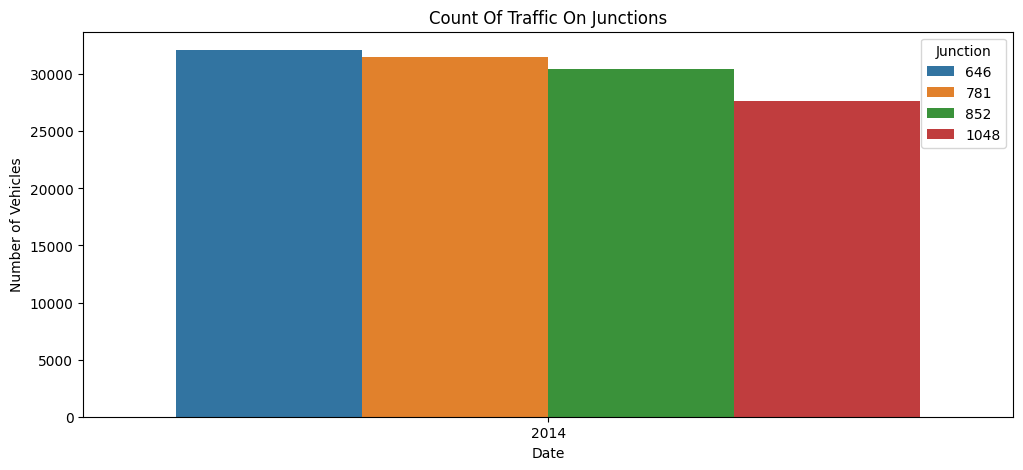

In [75]:
plt.figure(figsize=(12,5))
count = sns.countplot(data=df, x =df["Year"], hue="Junction")
count.set_title("Count Of Traffic On Junctions")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")

The count filters for junctions that had volume count of greater than 435000 in 2014

<Axes: >

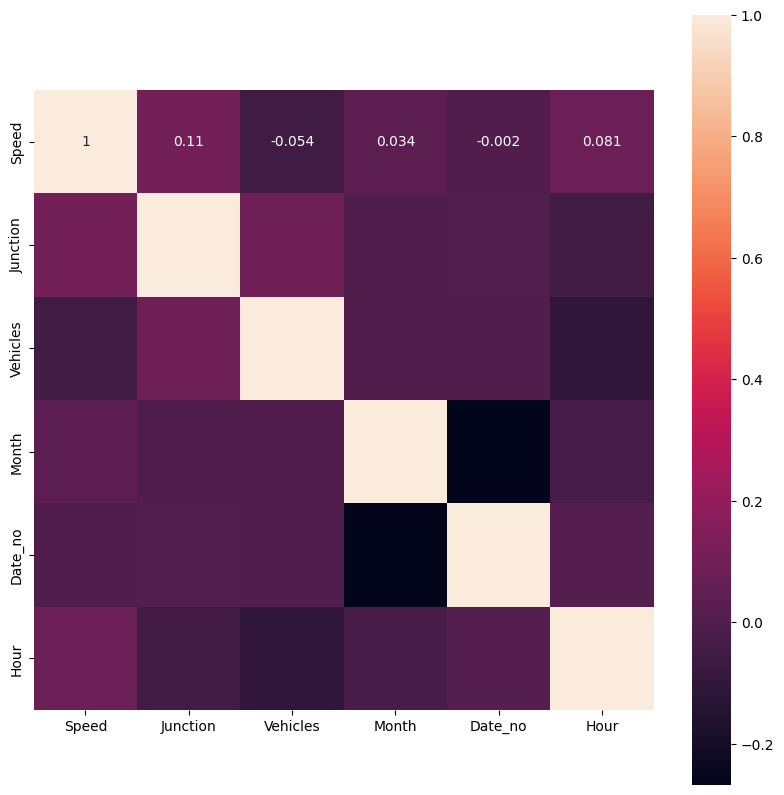

In [76]:
import numpy as np
# Select only numeric dtypes
numeric_df = df[df.columns[~df.columns.isin(['Year'])]].select_dtypes(include=[np.number])

# Compute correlation matrix
corrmat = numeric_df.corr()

# Plot heatmap 
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, annot=True, square=True )

The highest correlation is certainly with the preexisting feature. 

I will conclude my EDA with a pair plot. It's an interesting overall representation of any data. 

**Conclusions that I have come to draw after this EDA**

* There is a weak corelation between time of day, day of week and speed



# Data Transformation And Preprocessing

**In this step I will be following the subsequent order:**

* Creating different frames for each Vehicles and Speed and plotting them
* Transforming the series and plotting them
* Performing the Augmented Dickey-Fuller test to check the seasonality of transformed series
* Creating test and train sets

### Check for NaN

In [77]:
# Check for NaN values in 'Junction', 'Vehicles', and 'Speed' columns
nan_in_junction = df['Junction'].isna().any()
nan_in_vehicles = df['Vehicles'].isna().any()
nan_in_speed = df['Speed'].isna().any()

# Print the results
print(f"NaN values in 'Junction': {nan_in_junction}")
print(f"NaN values in 'Vehicles': {nan_in_vehicles}")
print(f"NaN values in 'Speed': {nan_in_speed}")


NaN values in 'Junction': False
NaN values in 'Vehicles': False
NaN values in 'Speed': False


In [78]:
df = df.dropna(subset=['Vehicles', 'Speed'])

In [79]:
# Check for NaN values in 'Junction', 'Vehicles', and 'Speed' columns
nan_in_junction = df['Junction'].isna().any()
nan_in_vehicles = df['Vehicles'].isna().any()
nan_in_speed = df['Speed'].isna().any()

# Print the results
print(f"NaN values in 'Junction': {nan_in_junction}")
print(f"NaN values in 'Vehicles': {nan_in_vehicles}")
print(f"NaN values in 'Speed': {nan_in_speed}")


NaN values in 'Junction': False
NaN values in 'Vehicles': False
NaN values in 'Speed': False


### Create a dataset and for the  Junction `646`

In [80]:
# Select subset of original DataFrame where Junction is 646
# And only include columns DateTime and Vehicles or Speed respectively

df_vehicles = df[df['Junction'] == 646][['DateTime', 'Vehicles']]
df_speed = df[df['Junction'] == 646][['DateTime', 'Speed']]

In [81]:
# Convert DateTime columns to datetime format in both DataFrames
df_vehicles['DateTime'] = pd.to_datetime(df['DateTime'])
df_speed['DateTime'] = pd.to_datetime(df['DateTime'])

# Set DateTime columns as index in both DataFrames 
df_vehicles.set_index('DateTime', inplace=True)
df_speed.set_index('DateTime', inplace=True)


In [82]:
df_vehicles.shape, df_speed.shape

((32117, 1), (32117, 1))

In [90]:
df_vehicles

,Vehicles
DateTime,
2014-02-13 11:30:00,35
2014-02-13 11:35:00,26
2014-02-13 11:40:00,31
2014-02-13 11:45:00,28
2014-02-13 11:50:00,35
...,...
2014-06-09 05:05:00,6
2014-06-09 05:10:00,7
2014-06-09 05:15:00,6


In [106]:
df_speed.head()

,Speed
DateTime,
2014-02-13 11:30:00,91
2014-02-13 11:35:00,100
2014-02-13 11:40:00,108
2014-02-13 11:45:00,106
2014-02-13 11:50:00,109


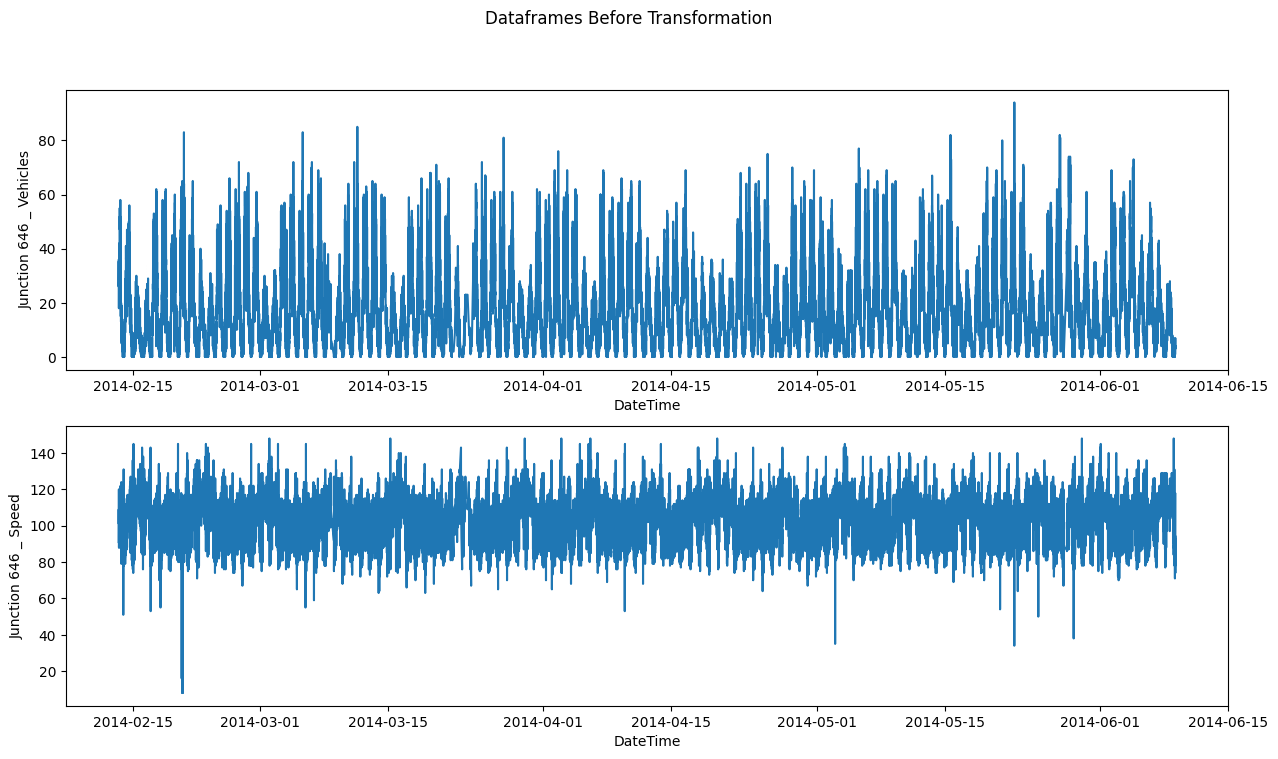

In [83]:
list_dfs = [df_vehicles, df_speed]   

#Function to plot comparitive plots of dataframes
def Sub_Plots(df_vehicles, df_speed, title):
    fig, axes = plt.subplots(2, 1, figsize=(15, 8))
    fig.suptitle(title)
    #J1
    pl_1=sns.lineplot(ax=axes[0],data=df_vehicles)
    #pl_1=plt.ylabel()
    axes[0].set(ylabel ="Junction 646 _ Vehicles")
    #J2
    pl_2=sns.lineplot(ax=axes[1],data=df_speed)
    axes[1].set(ylabel ="Junction 646 _ Speed")
    
    
#Plotting the dataframe to check for stationarity
Sub_Plots(df_vehicles.Vehicles, df_speed.Speed,"Dataframes Before Transformation")

A time series is stationary if it does not have a trend or seasonality. However, in the EDA, we saw a weekly seasonality and an upwards trend over the years. In the above plot, it is again established that Junctions one and two have an upward trend. If we limit the span we will be able to further see the weekly seasonality. I will be spairing that step at this point and moving on with the respective transforms on datasets.

**Steps for Transforming:**
* Normalizing 
* Differencing 

In [108]:
df_vehicles

,Vehicles
DateTime,
2014-02-13 11:30:00,35
2014-02-13 11:35:00,26
2014-02-13 11:40:00,31
2014-02-13 11:45:00,28
2014-02-13 11:50:00,35
...,...
2014-06-09 05:05:00,6
2014-06-09 05:10:00,7
2014-06-09 05:15:00,6


In [120]:
# Define Normalize function to normalize a dataframe
def Normalize(df):
    # Calculate the average of the dataframe
    average = df.mean()
    # Calculate the standard deviation of the dataframe
    stdev = df.std()
    # Normalize the dataframe by subtracting the mean and dividing by the standard deviation
    df_normalized = (df - average) / stdev
    # Return the normalized dataframe, along with the mean and standard deviation for potential future use
    return df_normalized, average, stdev

# Define Difference function to calculate differences over a specified interval in a dataframe 
def Difference(df, interval):
    # Initialize an empty list to store differences 
    diff = []
    
    # Iterate through the dataframe, starting from index 'interval'
    for i in range(interval, len(df)):
        # Calculate difference between current and past value (based on 'interval') 
        value = df.iloc[i] - df.iloc[i - interval]
        # Add calculated difference to list  
        diff.append(value)
    
    return diff

In accordance with the above observations, Differencing to eliminate the seasonality should be performed as follows:
* For Vehicles one, I will be taking a difference of weekly values. 
* For Speed two,consecutive days is a better choice

In [132]:
# Apply Normalize function to Vehicles column on DataFrame 'df_vehicles'
df_N_vehicles, av_vehicles, std_vehicles = Normalize(df_vehicles['Vehicles'])
# Apply Difference function on normalized DataFrame with a week's interval (24hrs * 7days)
Diff_vehicles = Difference(df_N_vehicles, interval=(24*7))

# Trim DataFrame to exclude first week's data (which do not have corresponding diff values)
df_N_vehicles = df_N_vehicles[24*7:]
df_N_vehicles.columns = ["Norm"]
df_N_vehicles["Diff"]= Diff_vehicles

# Repeat process for Speed column on DataFrame 'df_speed' 
df_N_speed, av_speed, std_speed = Normalize(df_speed['Speed'])
Diff_speed = Difference(df_N_speed, interval=(24))
df_N_speed = df_N_speed[24:]
df_N_speed.columns = ["Norm"]
df_N_speed["Diff"]= Diff_speed

# df_N_vehicles = pd.DataFrame(df_N_vehicles)
# df_N_speed = pd.DataFrame(df_N_speed)


**Plots of Transformed Dataframe**

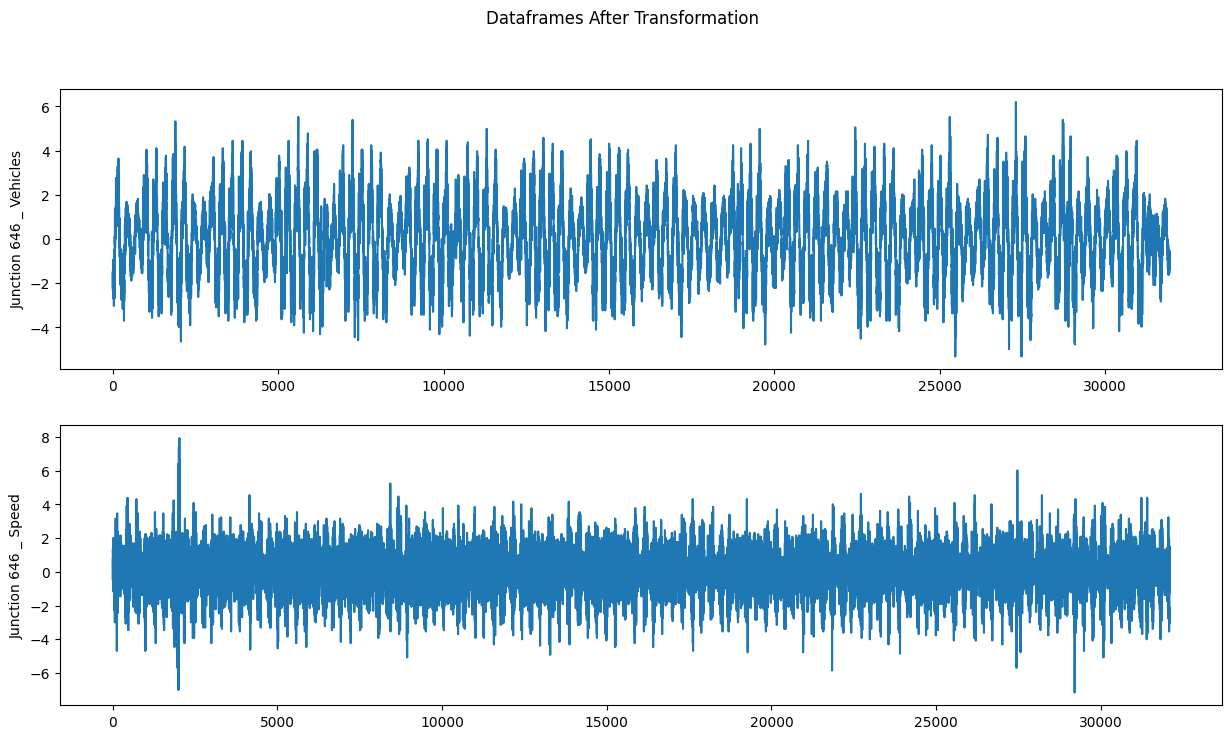

In [133]:
# Use subplots function to plot transformed dataframes 
Sub_Plots(df_N_vehicles.Diff, df_N_speed.Diff,"Dataframes After Transformation")

The plots above seem linear. To ensure they are Stationary I will be performing an Augmented Dickey-Fuller test. 

In [134]:
from pandas import Series

def Stationary_check(df):
    # Ensure df is a pandas Series
    if not isinstance(df, Series):
        df = Series(df)
    check = adfuller(df.dropna())
    print(f"ADF Statistic: {check[0]}")
    print(f"p-value: {check[1]}")
    print("Critical Values:")
    for key, value in check[4].items():
        print('\t%s: %.3f' % (key, value))
    if check[0] > check[4]["1%"]:
        print("Time Series is Non-Stationary")
    else:
        print("Time Series is Stationary") 

# Assuming df_N_vehicles["Diff"] and df_N_speed["Diff"] are pandas Series
List_df_ND = [df_N_vehicles["Diff"], df_N_speed["Diff"]] 

print("Checking the transformed series for stationarity:")
for i in List_df_ND:
    print("\n")
    Stationary_check(i)

Checking the transformed series for stationarity:


ADF Statistic: -19.75904272567937
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -27.683031288935076
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


**Now that the data is stationary,  preprocessing the data for the neural net by:**

* Splitting the test train sets
* Assigning X as features and y as target 
* Reshaping data for neural net

In [151]:
# Dropping NA values in the 'Diff' columns of both dataframes
df_vehicles = pd.Series(df_N_vehicles["Diff"]).dropna().to_frame()
df_speed = pd.Series(df_N_speed["Diff"]).dropna().to_frame()

# Function to split the dataset into training and test sets
def Split_data(df):
    # Determining the size of the training set (90% of total data)
    training_size = int(len(df)*0.90)
    data_len = len(df)
    # Splitting the dataframe into train and test sets
    train, test = df[0:training_size],df[training_size:data_len]
    # Reshaping the train and test datasets
    train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)
    return train, test

# Splitting both dataframes into training and testing sets
vehicle_train, vehicle_test = Split_data(df_vehicles)
speed_train, speed_test = Split_data(df_speed)

# Function to separate target variable and features in the dataset
def TnF(df):
    end_len = len(df)
    X = []
    y = []
    steps = 32
    # Creating feature (X) and target (y) arrays 
    for i in range(steps, end_len):
        X.append(df[i - steps:i, 0])
        y.append(df[i, 0])
        
    X, y = np.array(X), np.array(y)
    
    return X ,y

# Function to fix shape of feature arrays for compatibility with machine learning models 
def FeatureFixShape(train, test):
    
    train = np.reshape(train, (train.shape[0], train.shape[1], 1))
    test = np.reshape(test, (test.shape[0],test.shape[1],1))
    
    return train, test

# Assigning features and target for vehicles training and testing sets
X_train_vehicles, y_train_vehicles = TnF(vehicle_train)
X_test_vehicles, y_test_vehicles = TnF(vehicle_test)
X_train_vehicles, X_test_vehicles = FeatureFixShape(X_train_vehicles, X_test_vehicles)

# Assigning features and target for speed training and testing sets
X_train_speed, y_train_speed = TnF(speed_train)
X_test_speed, y_test_speed = TnF(speed_test)
X_train_speed, X_test_speed = FeatureFixShape(X_train_speed, X_test_speed)

# Model Building

For this project, I have settled to use Gated Recurrent Unit (GRU). In this section, I am creating a function for the neural net to call on and fit the data frames for all four junctions. 

In [165]:
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)

# LSTM Model for the prediction
def LSTM_model(X_Train, y_Train, X_Test, y_Test):
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True) 
    
    #The LSTM model 
    model = Sequential()
    model.add(LSTM(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, input_shape=(X_Train.shape[1],1), activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    #Compiling the model
    model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),loss='mean_squared_error')
    model.fit(X_Train,y_Train, validation_data=(X_Test, y_Test), epochs=50, batch_size=120,callbacks=[early_stopping])
    pred_LSTM = model.predict(X_Test)
    return pred_LSTM

# CNN Model for the prediction
def CNN_model(X_Train, y_Train, X_Test, y_Test):
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True) 
    
    #The CNN model 
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_Train.shape[1],1)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(units=1))
    
    #Compiling the model
    model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9),loss='mean_squared_error')
    model.fit(X_Train,y_Train, validation_data=(X_Test, y_Test), epochs=50, batch_size=120,callbacks=[early_stopping])
    pred_CNN = model.predict(X_Test)
    return pred_CNN


#To calculate the root mean squred error in predictions
def RMSE_Value(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
    return rmse

#To plot the comparitive plot of targets and predictions
def PredictionsPlot(test,predicted,m):
    plt.figure(figsize=(12,5))
    plt.plot(test,label="True Value",alpha=0.5 )
    plt.plot(predicted, color="#627D78",label="Predicted Values")
    plt.title("Traffic Prediction Vs True values")
    plt.xlabel("DateTime")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()

# Fitting The Model

Now, I will be fitting the transformed training sets of four junctions to the model created and compare them to the transformed test sets.

**Fitting the first junction and plotting the predictions and testset**

## Vehicles

In [152]:
# Predictions For Vehicles
print("\033[1;34;2m########------LSTM Model------########\033[0m")
PredVehicles_LSTM = LSTM_model(X_train_vehicles,y_train_vehicles,X_test_vehicles, y_test_vehicles)
print("-" * 70)

print("\033[1;32;2m########------CNN Model------########\033[0m")
PredVehicles_CNN = CNN_model(X_train_vehicles,y_train_vehicles,X_test_vehicles, y_test_vehicles)
print("-" * 70)

########------LSTM Model------########
Epoch 1/50
240/240 [==============================] - 38s 130ms/step - loss: 0.6178 - val_loss: 0.4780
Epoch 2/50
240/240 [==============================] - 30s 123ms/step - loss: 0.4610 - val_loss: 0.4155
Epoch 3/50
240/240 [==============================] - 30s 123ms/step - loss: 0.4381 - val_loss: 0.3911
Epoch 4/50
240/240 [==============================] - 30s 123ms/step - loss: 0.4205 - val_loss: 0.3813
Epoch 5/50
240/240 [==============================] - 30s 125ms/step - loss: 0.4016 - val_loss: 0.3694
Epoch 6/50
240/240 [==============================] - 30s 123ms/step - loss: 0.3940 - val_loss: 0.3450
Epoch 7/50
240/240 [==============================] - 30s 123ms/step - loss: 0.3886 - val_loss: 0.3387
Epoch 8/50
240/240 [==============================] - 30s 124ms/step - loss: 0.3751 - val_loss: 0.3357
Epoch 9/50
240/240 [==============================] - 30s 124ms/step - loss: 0.3632 - val_loss: 0.3208
Epoch 10/50
240/240 [=============


########------LSTM Model------########
The root mean squared error is 0.479444731107342.


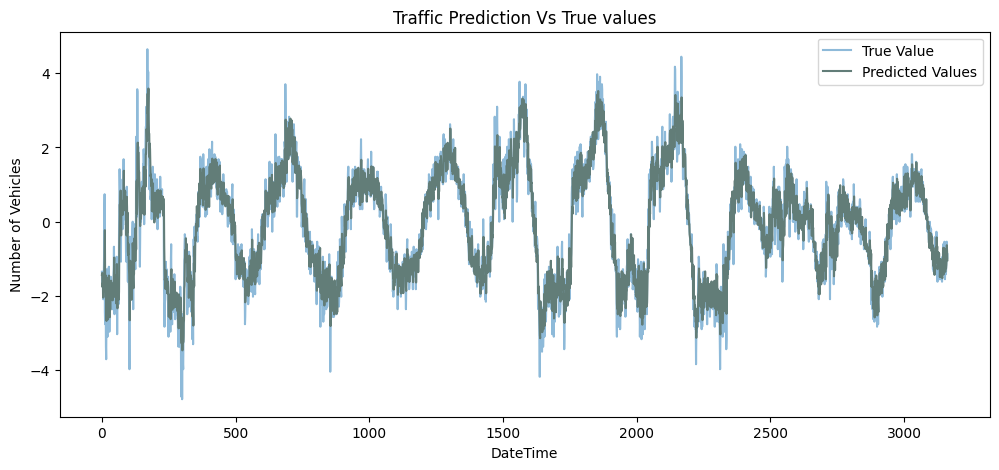


########------CNN Model------########
The root mean squared error is 0.5064589152787643.


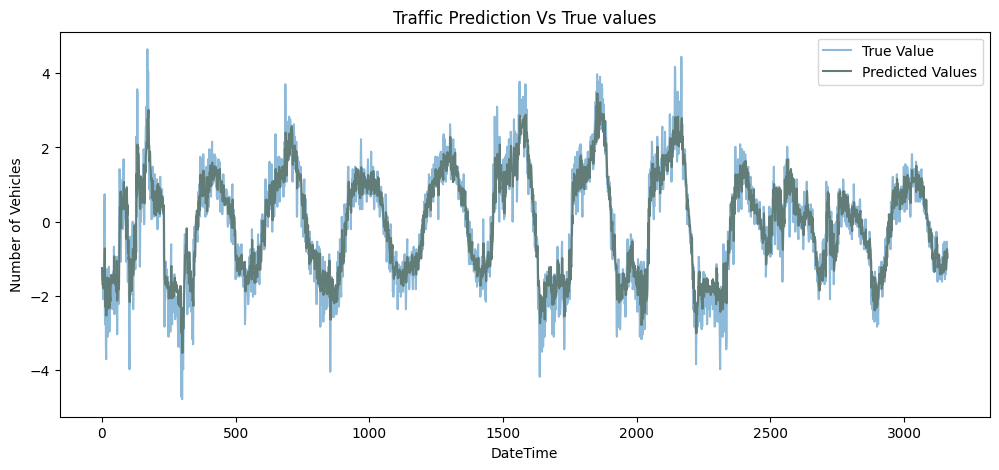


Best Model: LSTM - RMSE: 0.479444731107342



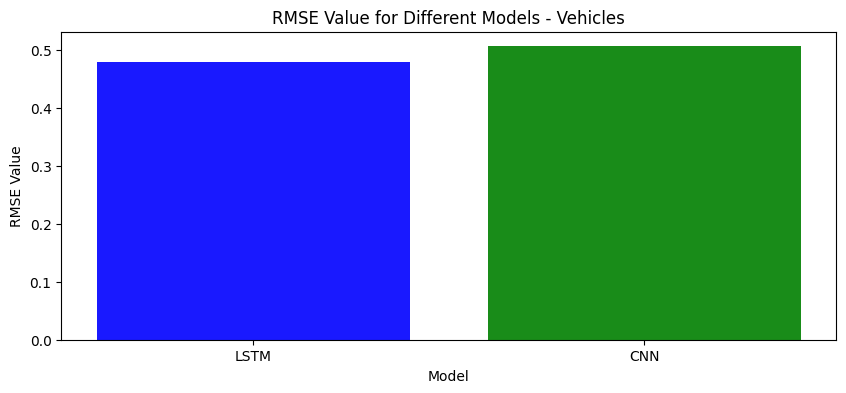

,MODEL,RMSE
0,LSTM,0.479445
1,CNN,0.506459


In [176]:
# Define colors array
colors = ['blue', 'green']

# Results for Vehicles - LSTM Model
print("\n\033[1;34;2m########------LSTM Model------########\033[0m")

# Calculate RMSE for LSTM Model and plot its predictions
RMSE_Vehicles_LSTM = RMSE_Value(y_test_vehicles, PredVehicles_LSTM)
PredictionsPlot(y_test_vehicles, PredVehicles_LSTM, 0)

# Results for Vehicles - CNN Model
print("\n\033[1;32;2m########------CNN Model------########\033[0m")

# Calculate RMSE for CNN Model and plot its predictions
RMSE_Vehicles_CNN = RMSE_Value(y_test_vehicles, PredVehicles_CNN)
PredictionsPlot(y_test_vehicles, PredVehicles_CNN, 0)

# Create a list of model names and their corresponding RMSE values
model_names = ["LSTM", "CNN"]
rmse_values = [RMSE_Vehicles_LSTM, RMSE_Vehicles_CNN]

# Create a DataFrame with model names and their corresponding rmse values
model_rmse = list(zip(model_names, rmse_values))
Results_df = pd.DataFrame(model_rmse, columns=["MODEL", "RMSE"])

# Find the best model with the minimum RMSE value
best_model_index = rmse_values.index(min(rmse_values))
best_model_name_vehicle = model_names[best_model_index]
best_model_rmse_vehicle = rmse_values[best_model_index]

# Print the best model name and its RMSE value
print("\n\033[1;31;4mBest Model: {} - RMSE: {}\n".format(best_model_name_vehicle, best_model_rmse_vehicle))

# Plot the bar graph for model names and RMSE values with transparency and lighter colors
fig, ax = plt.subplots(figsize=(10, 4))  # Set the figure size (width, height)
ax.bar(model_names, rmse_values, color=colors[:len(model_names)], alpha=0.9)
ax.set_xlabel('Model')
ax.set_ylabel('RMSE Value')
ax.set_title('RMSE Value for Different Models - Vehicles')
plt.show()

# Display the DataFrame
display(Results_df)

In [170]:
# # Saving the predictions into an array with original values and final values
# vehicle_predictions_array_lstm = np.array([y_test_speed,PredVehicles_LSTM])
# vehicle_predictions_array_cnn = np.array([y_test_speed,PredVehicles_CNN])

# # Saving them into a csv file
# np.savetxt("vehicle_lstm_predictions.csv", vehicle_predictions_array_lstm, delimiter=",")
# np.savetxt("vehicle_cnn_predictions.csv", vehicle_predictions_array_cnn, delimiter=",")

### Speed

In [153]:
print("\033[1;34;2m########------LSTM Model------########\033[0m")
Pred_speed_LSTM = LSTM_model(X_train_speed, y_train_speed, X_test_speed, y_test_speed)
print("-" * 70)
print("\033[1;32;2m########------CNN Model------########\033[0m")
Pred_speed_CNN = CNN_model(X_train_speed, y_train_speed, X_test_speed, y_test_speed)
print("-" * 70)

########------LSTM Model------########
Epoch 1/50
241/241 [==============================] - 38s 130ms/step - loss: 1.2678 - val_loss: 1.2672
Epoch 2/50
241/241 [==============================] - 30s 123ms/step - loss: 1.2192 - val_loss: 1.2440
Epoch 3/50
241/241 [==============================] - 30s 125ms/step - loss: 1.2066 - val_loss: 1.2329
Epoch 4/50
241/241 [==============================] - 30s 124ms/step - loss: 1.1965 - val_loss: 1.2421
Epoch 5/50
241/241 [==============================] - 30s 124ms/step - loss: 1.1952 - val_loss: 1.2306
Epoch 6/50
241/241 [==============================] - 30s 124ms/step - loss: 1.1862 - val_loss: 1.2127
Epoch 7/50
241/241 [==============================] - 30s 124ms/step - loss: 1.1815 - val_loss: 1.2104
Epoch 8/50
241/241 [==============================] - 30s 124ms/step - loss: 1.1723 - val_loss: 1.2087
Epoch 9/50
241/241 [==============================] - 30s 124ms/step - loss: 1.1582 - val_loss: 1.1835
Epoch 10/50
241/241 [=============


########------LSTM Model------########
The root mean squared error is 0.8836304878529752.


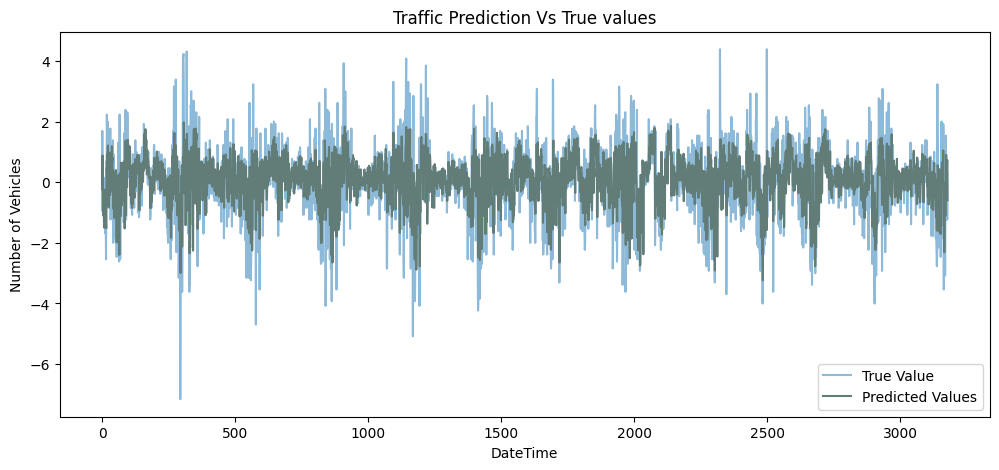


########------CNN Model------########
The root mean squared error is 0.901769923676502.


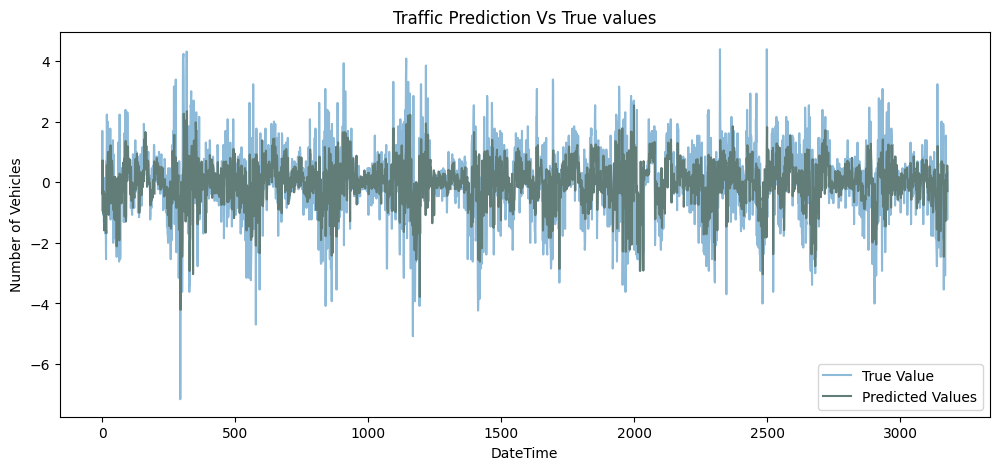


Best Model: LSTM - RMSE: 0.8836304878529752



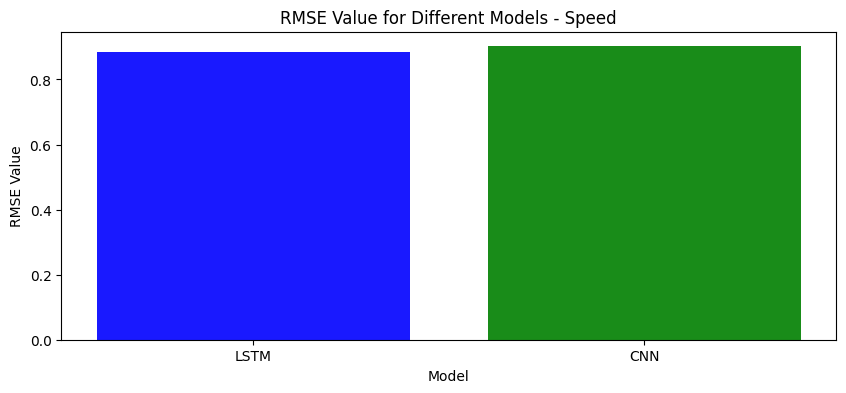

,MODEL,RMSE
0,LSTM,0.88363
1,CNN,0.90177


In [175]:
# Define colors array
colors = ['blue', 'green']


# Results for speed - LSTM Model
print("\n\033[1;34;2m########------LSTM Model------########\033[0m")

# Calculate RMSE for LSTM Model and plot its predictions
RMSE_speed_LSTM = RMSE_Value(y_test_speed, Pred_speed_LSTM)
PredictionsPlot(y_test_speed, Pred_speed_LSTM, 0)

# Results for speed - CNN Model
print("\n\033[1;32;2m########------CNN Model------########\033[0m")

# Calculate RMSE for CNN Model and plot its predictions
RMSE_speed_CNN = RMSE_Value(y_test_speed, Pred_speed_CNN)
PredictionsPlot(y_test_speed, Pred_speed_CNN, 0)

# Create a list of model names and their corresponding RMSE values
model_names = ["LSTM", "CNN"]
rmse_values = [RMSE_speed_LSTM, RMSE_speed_CNN]

# Create a DataFrame with model names and their corresponding rmse values
model_rmse = list(zip(model_names, rmse_values))
Results_df = pd.DataFrame(model_rmse, columns=["MODEL", "RMSE"])

# Find the best model with the minimum RMSE value
best_model_index = rmse_values.index(min(rmse_values))
best_model_name_speed = model_names[best_model_index]
best_model_rmse_speed = rmse_values[best_model_index]

# Print the best model name and its RMSE value
print("\n\033[1;31;4mBest Model: {} - RMSE: {}\n".format(best_model_name_speed, best_model_rmse_speed))

# Plot the bar graph for model names and RMSE values with transparency and lighter colors
fig, ax = plt.subplots(figsize=(10, 4))  # Set the figure size (width, height)
ax.bar(model_names, rmse_values, color=colors[:len(model_names)], alpha=0.9)
ax.set_xlabel('Model')
ax.set_ylabel('RMSE Value')
ax.set_title('RMSE Value for Different Models - Speed')
plt.show()

# Display the DataFrame
display(Results_df)

In [171]:
# # Saving the predictions into an array with original values and final values
# speed_predictions_array_lstm = np.array([y_test_speed,Pred_speed_LSTM])
# speed_predictions_array_cnn = np.array([y_test_speed,Pred_speed_CNN])

# # Saving them into a csv file
# np.savetxt("speed_lstm_predictions.csv", speed_predictions_array_lstm, delimiter=",")
# np.savetxt("speed_cnn_predictions.csv", speed_predictions_array_cnn, delimiter=",")

# Denormalization of the Data

In this section, we inversing transforms that I applied to the datasets to remove the seasonality and trends. 
Performing this step will make the predictions get back on the accurate scale. 

**Denormalization of Vehicles**

DateTime
2014-06-03 05:00:00     5.398085
2014-06-03 05:05:00     5.074614
2014-06-03 05:10:00    -6.815969
2014-06-03 05:15:00    -3.562425
2014-06-03 05:20:00    18.908574
                         ...    
2014-06-09 05:05:00   -22.517963
2014-06-09 05:10:00   -20.975289
2014-06-09 05:15:00   -14.648797
2014-06-09 05:20:00   -29.660596
2014-06-09 05:35:00   -25.374355
Name: Pred_Final, Length: 1411, dtype: object
Column 'Vehicles' does not exist in the given dataframe.


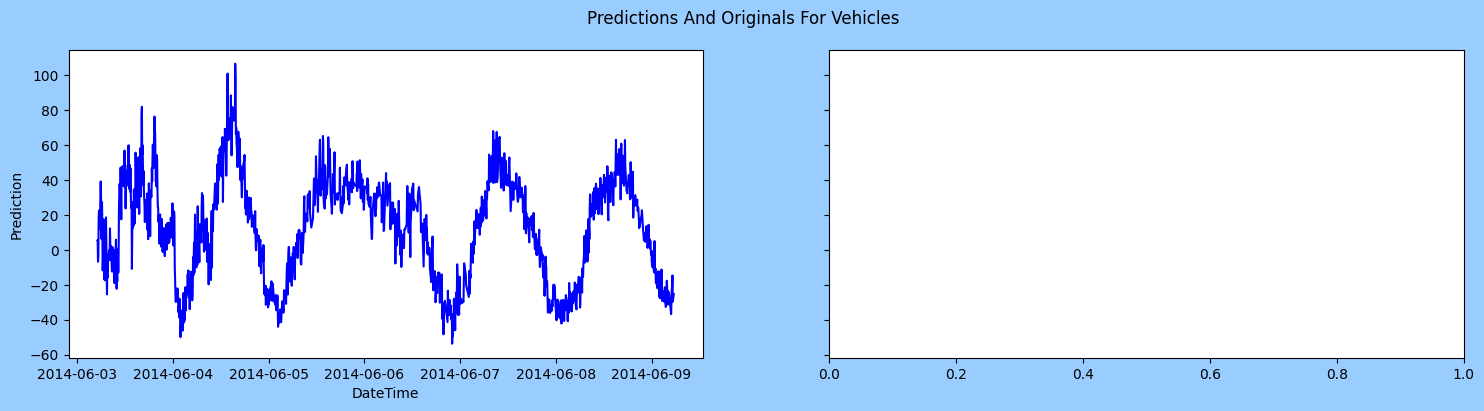

In [243]:
def Sub_Plots2(dataf_1, dataf_2,title,m):
    fig, axes = plt.subplots(1, 2, figsize=(18,4), sharey=True,facecolor="#99ccff")
    fig.suptitle(title)
    
    pl_1=sns.lineplot(ax=axes[0],data=dataf_1,color=colors[m])
    axes[0].set(ylabel ="Prediction")
    
    # Check if 'Vehicles' is a valid key for dataf_2
    if "Vehicles" in dataf_2:
        pl_2=sns.lineplot(ax=axes[1],data=dataf_2,color="#627D78")
        axes[1].set(ylabel ="Original")
    else:
        print("Column 'Vehicles' does not exist in the given dataframe.")

recover_lstm = df_N_vehicles[-1412:-1].to_frame()
recover_lstm["Pred"]= PredVehicles_LSTM[:len(recover_lstm)]
Transform_reversed_lstm = inverse_difference(recover_lstm['Vehicles'], recover_lstm.Pred).to_frame()
Transform_reversed_lstm.columns = ["Pred_Normed"]


#Denormalize the LSTM Predictions 
Final_Pred_LSTM_Vehicles = Denormalize(Transform_reversed_lstm.values,std_vehicles , av_vehicles)
Transform_reversed_lstm["Pred_Final"] = Final_Pred_LSTM_Vehicles[:, 0]
#Plotting the Predictions with originals 
Sub_Plots2(Transform_reversed_lstm["Pred_Final"], df_vehicles[-1412:-1],"Predictions And Originals For Vehicles", 0)

**Summary**

In this project, I trained a  CNN and LSTM and predicted Traffir and Speed.  We used normalisation and differencing transform to achieve a stationary timeseries.I applyied the root mean squred error as the evaluation metric for the model. In addition to that I plotted the Predictions alongside the original test values.
Take aways from the data analysis:
